## Bingo – Housie – Tambola 

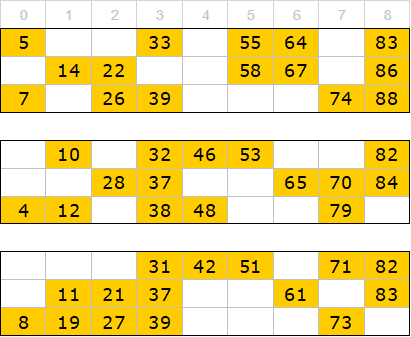

<b> Bingo</b> is a game of probability in which players mark off numbers on cards as the numbers are drawn randomly by a caller, the winner being the first person to mark off all their numbers. (Wikipedia)

#### Our ticketing Rules:

1.	Every ticket has 15 numbers
2.	Every row has 5
3.	Every column in a tick can have either 0,1,2 or 3 numbers
4.	Always arranged in ascending order in a column
5.	Column (0) can have number from 1 to 9 	– 9 options
6.	Column (1) can have number from 10 to 19 	– 10 options

…

12.	Column (7) can have number from 10 to 19 	– 10 options
13.	Column (8) can have number from 80 to 90 	– 11 options


----------------

--------------

In [11]:
from itertools import combinations_with_replacement
#----to measure RAM use and time ----#
import tracemalloc
from datetime import datetime
tracemalloc.start()
tstart = datetime.now()
#------------------------------------#

## one suggestion:
#Activity 1:
combi = [i for i in combinations_with_replacement([3,2,1,0],9) if sum(i)==15]
options = pd.DataFrame(combi).drop_duplicates(keep='first').reset_index(drop=True)
print(options)
print('---------------------------------------')

#Activity 2:
## getting the permutations for 1 combination
p = permutations(combi[1])
p = pd.DataFrame(p)
#dropping the duplicates (1st occurence is kept) and printing it out.
p = p.drop_duplicates(keep='first').reset_index(drop=True)
print(p)

print('---------------------------------------')


#----to measure RAM use and time ----#    
tend = datetime.now()
print(tend-tstart)

current, peak = tracemalloc.get_traced_memory()
print(f"Current memory usage is {current / 10**6}MB; Peak was {peak / 10**6}MB")
tracemalloc.stop()
#------------------------------------#


    0  1  2  3  4  5  6  7  8
0   3  3  3  3  3  0  0  0  0
1   3  3  3  3  2  1  0  0  0
2   3  3  3  3  1  1  1  0  0
3   3  3  3  2  2  2  0  0  0
4   3  3  3  2  2  1  1  0  0
5   3  3  3  2  1  1  1  1  0
6   3  3  3  1  1  1  1  1  1
7   3  3  2  2  2  2  1  0  0
8   3  3  2  2  2  1  1  1  0
9   3  3  2  2  1  1  1  1  1
10  3  2  2  2  2  2  2  0  0
11  3  2  2  2  2  2  1  1  0
12  3  2  2  2  2  1  1  1  1
13  2  2  2  2  2  2  2  1  0
14  2  2  2  2  2  2  1  1  1
---------------------------------------
      0  1  2  3  4  5  6  7  8
0     3  3  3  3  2  1  0  0  0
1     3  3  3  3  2  0  1  0  0
2     3  3  3  3  2  0  0  1  0
3     3  3  3  3  2  0  0  0  1
4     3  3  3  3  1  2  0  0  0
...  .. .. .. .. .. .. .. .. ..
2515  0  0  0  1  3  3  3  3  2
2516  0  0  0  1  3  3  3  2  3
2517  0  0  0  1  3  3  2  3  3
2518  0  0  0  1  3  2  3  3  3
2519  0  0  0  1  2  3  3  3  3

[2520 rows x 9 columns]
---------------------------------------
0:00:01.225698
Current memory u

## What is the code doing wrt bigger picture

-  The code is trying to find the pattern in which we should fill the numbers in the ticket, if a column would have 3/2/1/no numbers. We are finding combinations of having:
    - to fill most of the numbers with \"three\"; 5 \"three\" numbers can be filled atmost: 3*5 is 15 and rest can be empty(or 0)
    - to fill most of the numbers with \"two'; 7 \"two\" numbers can be filled atmost: 7*2 is 14 and rest can be 1 and others empty(or 0)
    - to fill most of the numbers with \"one\"; 6 \"one\" numbers can be filled atmost. Only then 15 as total number can be achieved. i.e 6*1 + 3*3=15
    - similarly to fill most of the numbers with \"zero\"; atmost possibility is 4 \"zeros\". Only then 15 as total number can be achieved. i.e 3*5 + 0*4=15

So, while finding combinations (3,3,3,3,3,2,2,2,2,2,2,2,1,1,1,1,1,1,0,0,0,0) are kept. Possibly we can use combination with replacement for this step with 0,1,2,3.

Combination of [3, 3, 3, 3, 2, 1, 0, 0, 0] would mean:


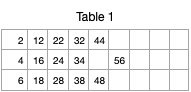




Further to this we are finding various permutations of this given combination i.e different ways one can have 3 empty columns, 1 column with 1 value, 1 column with 2 values, 4 columns with all values filled in.
example- 2 of the permutations for the given combination could be:

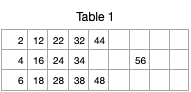

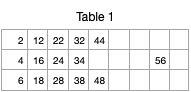